In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, datasets

# Looking for initial information in the dataset

In [2]:
dms = pd.read_csv('diamonds.csv')
histdms = pd.read_csv('diamonds1.csv')

In [3]:
histdms.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
histdms['clarity'].value_counts()

SI1     11832
VS2     11125
SI2      8307
VS1      7449
VVS2     4635
VVS1     3321
IF       1613
I1        658
Name: clarity, dtype: int64

In [5]:
histdms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
histdms.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
histdms.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


# Changing the data 

In [8]:
cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal":5}
color_dict = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J":7}
clarity_dict = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1":5, "VVS2":6, "VVS1":7, "IF": 8}
histdms['cut'] = histdms['cut'].map(cut_class_dict)
histdms['clarity'] = histdms['clarity'].map(clarity_dict)
histdms['color'] = histdms['color'].map(color_dict)
histdms.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,7,6,62.8,57.0,336,3.94,3.96,2.48


In [9]:
cut_class_dict1 = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal":5}
color_dict1 = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J":7}
clarity_dict1 = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1":5, "VVS2":6, "VVS1":7, "IF": 8}
dms['cut'] = dms['cut'].map(cut_class_dict1)
dms['clarity'] = dms['clarity'].map(clarity_dict1)
dms['color'] = dms['color'].map(color_dict1)
dms.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,3,5,2,63.4,57.0,6.10,6.18,3.89
1,0.38,2,3,4,60.3,61.0,4.68,4.71,2.83
2,0.52,5,5,4,61.8,56.0,5.19,5.16,3.20
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18


In [10]:
histdms.loc[(histdms['x'] != 0) & (histdms['y'] != 0) & (histdms['z'] == 0), 'z'] = (histdms['depth']/100) * ((histdms['x'] + histdms['y'])/2)

In [11]:
histdms.drop(histdms.loc[(histdms['x'] ==0) & (histdms['y'] == 0), :].index, inplace =True)

# Analysing the relation between variables.

<AxesSubplot:>

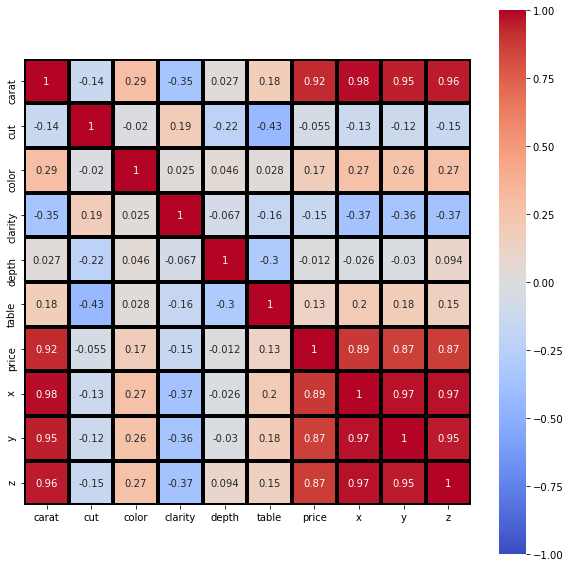

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(histdms.corr(), annot = True, vmin=-1, vmax=1, center= 0, fmt='.2g',
            cmap= 'coolwarm', linewidths=3, linecolor='black', square = True)

C:\Users\eduar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

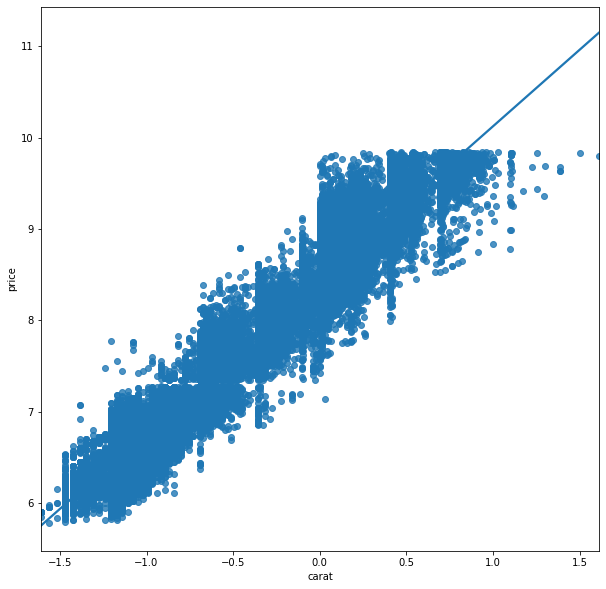

In [13]:
plt.figure(figsize=(10, 10))
sns.regplot(np.log(histdms.carat), np.log(histdms.price), scatter=True)

# Model 

In [23]:
X = np.log(histdms[['carat', 'clarity', 'color', 'cut', 'table', 'depth']])
y = np.log(histdms['price'])
model = LinearRegression()
model.fit(X,y)
y_pred1 = model.predict((X))
histdms['price_predicted'] = np.exp((y_pred1))
histdms

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted
0,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,271.775636
1,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31,389.489754
2,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63,453.876627
3,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,332.935214
4,0.24,3,7,6,62.8,57.0,336,3.94,3.96,2.48,366.203785
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,1,3,62.7,59.0,2757,5.69,5.73,3.58,3117.395693
48936,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50,3205.015143
48937,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61,2935.308399
48938,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56,2877.106871


In [15]:
model.score(X, y)

0.9781521961026837

In [21]:
X1 = np.log(dms[['carat', 'clarity', 'color', 'cut', 'table', 'depth']])
y_pred12 = model.predict(X1)
dms['price_predicted'] = np.exp((y_pred12))
dms

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,3,5,2,63.4,57.0,6.10,6.18,3.89,2773.826797
1,0.38,2,3,4,60.3,61.0,4.68,4.71,2.83,816.710926
2,0.52,5,5,4,61.8,56.0,5.19,5.16,3.20,1438.064477
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,6818.654817
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,17024.517376
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,3,1,2,62.2,59.0,4.25,4.30,2.66,485.990269
4996,0.51,5,3,6,61.9,56.0,5.09,5.14,3.16,1875.793055
4997,1.01,3,3,3,60.6,60.0,6.37,6.43,3.88,4581.818253
4998,0.31,5,3,7,62.1,56.0,4.35,4.38,2.71,796.791115


In [22]:
dms.to_csv('dms1.csv')